## Exponential moving averages crossing using neural network 

To perform classification task on technical indicators these following  steps followed 

1) Install required python libraries talib , pytorch  etc.

2) Get data for portfolio stocks from Yahoo Finance API

3) Compute technical stock trading indicators using ta-lib

4) Transform technical indicators into features

5) Feed features to PyTorch neural network

6) Using sklearn split data into train and test dataset

7) Calculate strategy returns

8) Integrate strategies with pyfolio for backtesting 

## 1) Install Technical Analysis Library TA-LIB

In [1]:
!python --version

Python 3.10.11


In [2]:
!pip install -U numpy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Working with Talib in Colab is tricky. Code will fail at import talib first. You need to restart runtime and run all.
# 2nd time it will run problem. For local once you have talib installed, you can comment talib related code.
# download TA-Lib 
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 

--2023-05-28 14:25:09--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-05-28 14:25:09--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-05-28 14:25:09--  http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cytranet.dl.s

In [4]:
!tar xvzf ta-lib-0.4.0-src.tar.gz

ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/output.1
ta-lib/autom4te.cache/traces.0
ta-lib/autom4te.cache/traces.1
ta-lib/ltmain.sh
ta-lib/ta-lib-config.in
ta-lib/src/
ta-lib/src/ta_func/
ta-lib/src/ta_func/ta_MACDFIX.c
ta-lib/src/ta_func/ta_CDLPIERCING.c
ta-lib/src/ta_func/ta_DIV.c
ta-lib/src/ta_func/ta_ROCR100.c
ta-lib/src/ta_func/ta_ADXR.c
ta-lib/src/ta_func/ta_MAVP.c
ta-lib/src/ta_func/ta_CDLCLOSINGMARUBOZU.c
ta-lib/src/ta_func/ta_COSH.

In [5]:
import os

In [6]:
os.chdir('ta-lib') # Can't use !cd in co-lab

In [7]:
!./configure --prefix=/usr

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /usr/bin/sed
checking for grep that handles long lines and -e... /usr/bin/grep
chec

In [8]:
!make

Making all in src
make[1]: Entering directory '/content/ta-lib/src'
Making all in ta_abstract
make[2]: Entering directory '/content/ta-lib/src/ta_abstract'
make[2]: Nothing to be done for 'all'.
make[2]: Leaving directory '/content/ta-lib/src/ta_abstract'
Making all in ta_common
make[2]: Entering directory '/content/ta-lib/src/ta_common'
make[2]: Nothing to be done for 'all'.
make[2]: Leaving directory '/content/ta-lib/src/ta_common'
Making all in ta_func
make[2]: Entering directory '/content/ta-lib/src/ta_func'
make[2]: Nothing to be done for 'all'.
make[2]: Leaving directory '/content/ta-lib/src/ta_func'
make[2]: Entering directory '/content/ta-lib/src'
make[2]: Nothing to be done for 'all-am'.
make[2]: Leaving directory '/content/ta-lib/src'
make[1]: Leaving directory '/content/ta-lib/src'
Making all in src/tools
make[1]: Entering directory '/content/ta-lib/src/tools'
Making all in gen_code
make[2]: Entering directory '/content/ta-lib/src/tools/gen_code'
make  gen_code
make[3]: Ente

In [9]:
!make install
# wait ~ 30s

Making install in src
make[1]: Entering directory '/content/ta-lib/src'
Making install in ta_abstract
make[2]: Entering directory '/content/ta-lib/src/ta_abstract'
make[3]: Entering directory '/content/ta-lib/src/ta_abstract'
make[3]: Nothing to be done for 'install-exec-am'.
test -z "/usr/include/ta-lib/" || /usr/bin/mkdir -p "/usr/include/ta-lib/"
 /usr/bin/install -c -m 644 '../../include/ta_defs.h' '/usr/include/ta-lib//ta_defs.h'
 /usr/bin/install -c -m 644 '../../include/ta_libc.h' '/usr/include/ta-lib//ta_libc.h'
 /usr/bin/install -c -m 644 '../../include/ta_abstract.h' '/usr/include/ta-lib//ta_abstract.h'
make[3]: Leaving directory '/content/ta-lib/src/ta_abstract'
make[2]: Leaving directory '/content/ta-lib/src/ta_abstract'
Making install in ta_common
make[2]: Entering directory '/content/ta-lib/src/ta_common'
make[3]: Entering directory '/content/ta-lib/src/ta_common'
make[3]: Nothing to be done for 'install-exec-am'.
test -z "/usr/include/ta-lib/" || /usr/bin/mkdir -p "/usr/

In [10]:
os.chdir('../')

In [11]:
!pip install TA-Lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **TA-Lib** is widely used by trading software developers requiring to perform technical analysis of financial market data. Includes 150+ technical indicators such as ADX, MACD, RSI, Stochastic, Bollinger Bands, etc. Candlestick pattern recognition

In [12]:
# Mount your google drive in google colab
# using google colab infrastructure mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Insert the directory
# Right click on SwingTrader folder from shared files and select create short cut to add at My Drive
import sys
sys.path.insert(0,'/content/drive/My Drive/SwingTrader')

In [14]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2) Get data for portfolio stocks from Yahoo Finance API

### In high level this nueral net uses three main steps Data Preparation , Model design and training strategy

### Data Preparation . download time series data from yahoo finanace and calculate technical indicators using ta-lib

### Model uses a list of tech indictors in nueral net for gradient calculation and classification of data to decide buy call

### Training strategy is split data for training and testing at 30% rate which basic can be customizable 

In [15]:
from dataloaders import get_data_from_yahoo

In [16]:
ticker = "AAPL"

In [17]:
start_date = "2015-01-01"
end_date = "2022-12-31"

In [18]:
aapl = get_data_from_yahoo.get_data(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
connected to yahoo


In [19]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.531765,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.840662,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.842909,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.177242,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.106186,237458000
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674026,85438400


## 3) Compute technical stock trading indicators using ta-lib

In [20]:
import talib as ta
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [21]:
def calculate_technical_indicators(df):
    '''This method to calculate required technical indicators of the stock price time series data. Here we are calculating Exponential moving averages for all different periods ranging from 5 , 10 days to 200 day
      '''
    df['EMA5'] = ta.EMA(df['Adj Close'].values, timeperiod=5)
    df['EMA10'] = ta.EMA(df['Adj Close'].values, timeperiod=10)
    df['EMA15'] = ta.EMA(df['Adj Close'].values, timeperiod=15)
    df['EMA20'] = ta.EMA(df['Adj Close'].values, timeperiod=10)
    df['EMA30'] = ta.EMA(df['Adj Close'].values, timeperiod=30)
    df['EMA40'] = ta.EMA(df['Adj Close'].values, timeperiod=40)
    df['EMA50'] = ta.EMA(df['Adj Close'].values, timeperiod=50)

    df['EMA60'] = ta.EMA(df['Adj Close'].values, timeperiod=60)
    df['EMA70'] = ta.EMA(df['Adj Close'].values, timeperiod=70)
    df['EMA80'] = ta.EMA(df['Adj Close'].values, timeperiod=80)
    df['EMA90'] = ta.EMA(df['Adj Close'].values, timeperiod=90)
    
    df['EMA100'] = ta.EMA(df['Adj Close'].values, timeperiod=100)
    df['EMA150'] = ta.EMA(df['Adj Close'].values, timeperiod=150)
    df['EMA200'] = ta.EMA(df['Adj Close'].values, timeperiod=200)

    df['upperBB'], df['middleBB'], df['lowerBB'] = ta.BBANDS(df['Adj Close'].values, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

    df['SAR'] = ta.SAR(df['High'].values, df['Low'].values, acceleration=0.02, maximum=0.2)  
    df['RSI'] = ta.RSI(df['Adj Close'].values, timeperiod=14)
    df['normRSI'] = ta.RSI(df['Adj Close'].values, timeperiod=14) / 100.0
    
    df.tail()

    return df

In [22]:
tech_df = calculate_technical_indicators(aapl)
tech_df

,Open,High,Low,Close,Adj Close,Volume,EMA5,EMA10,EMA15,EMA20,...,EMA90,EMA100,EMA150,EMA200,upperBB,middleBB,lowerBB,SAR,RSI,normRSI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.531765,212818400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.840662,257142000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.860001,NaN,NaN
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.842909,263188400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.829851,NaN,NaN
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.177242,160423600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.762957,NaN,NaN
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.106186,237458000,24.299753,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.157499,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900,133.118929,135.538387,137.434161,135.538387,...,145.873305,146.408929,148.318469,149.097294,151.512128,140.252566,128.993004,141.034236,35.694644,0.356946
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800,131.963431,134.468214,136.461445,134.468214,...,145.516803,146.077117,148.071237,148.903812,151.575495,139.545126,127.514756,139.439042,33.675322,0.336753
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674026,85438400,129.866963,132.869271,135.113018,132.869271,...,145.080698,145.673096,147.774585,148.672670,152.231066,138.790823,125.350579,137.723996,29.726634,0.297266


In [23]:
def define_target_condition(df):
    ''' This is custom logic or trade intution here we are using basic where Adj close price grater than exponential moving averages of 150 days'''
    
    # price above trend multiple days later
    df['target_cls'] = np.where(df['Adj Close'].shift(-34) > df.EMA150.shift(-34), 1, 0)

    df=df.fillna(0).copy()
    
    df.tail()
    
    return df

#### EMA Crossover Strategy

In [24]:
def calculate_features(df):
    # computes features exponential moving averages for  decision making
    df['aboveEMA5'] = np.where(df['Adj Close'] > df['EMA5'], 1, 0)
    df['aboveEMA10'] = np.where(df['Adj Close'] > df['EMA10'], 1, 0)
    df['aboveEMA15'] = np.where(df['Adj Close'] > df['EMA15'], 1, 0)
    df['aboveEMA20'] = np.where(df['Adj Close'] > df['EMA20'], 1, 0)
    df['aboveEMA30'] = np.where(df['Adj Close'] > df['EMA30'], 1, 0)
    df['aboveEMA40'] = np.where(df['Adj Close'] > df['EMA40'], 1, 0)
    
    df['aboveEMA50'] = np.where(df['Adj Close'] > df['EMA50'], 1, 0)
    df['aboveEMA60'] = np.where(df['Adj Close'] > df['EMA60'], 1, 0)
    df['aboveEMA70'] = np.where(df['Adj Close'] > df['EMA70'], 1, 0)
    df['aboveEMA80'] = np.where(df['Adj Close'] > df['EMA80'], 1, 0)
    df['aboveEMA90'] = np.where(df['Adj Close'] > df['EMA90'], 1, 0)
    
    df['aboveEMA100'] = np.where(df['Adj Close'] > df['EMA100'], 1, 0)
    df['aboveEMA150'] = np.where(df['Adj Close'] > df['EMA150'], 1, 0)
    df['aboveEMA200'] = np.where(df['Adj Close'] > df['EMA200'], 1, 0)

    df['aboveUpperBB'] = np.where(df['Adj Close'] > df['upperBB'], 1, 0)
    df['belowLowerBB'] = np.where(df['Adj Close'] < df['lowerBB'], 1, 0)
    
    df['aboveSAR'] = np.where(df['Adj Close'] > df['SAR'], 1, 0)
   
    df['oversoldRSI'] = np.where(df['RSI'] < 30, 1, 0)
    df['overboughtRSI'] = np.where(df['RSI'] > 70, 1, 0)


    df=df.fillna(0).copy()
    
    df.tail()

    return df

In [25]:
df = calculate_technical_indicators(tech_df)
df = calculate_features(df)
df = define_target_condition(df)
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA5,EMA10,EMA15,EMA20,...,aboveEMA90,aboveEMA100,aboveEMA150,aboveEMA200,aboveUpperBB,belowLowerBB,aboveSAR,oversoldRSI,overboughtRSI,target_cls
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.531765,212818400,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.840662,257142000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.842909,263188400,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.177242,160423600,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.106186,237458000,24.299753,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
def plot_train_data(df):
    # plot price
    plt.figure(figsize=(15,2.5))
    plt.title('Stock data ' + str(ticker))
    plt.plot(df.index, df['Adj Close'])
    #plt.title('Price chart (Adj Close) ' + str(ticker))
    plt.show()

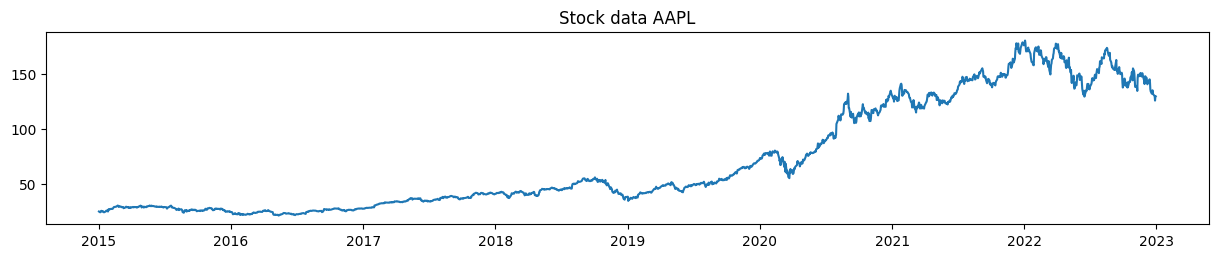

In [27]:
plot_train_data(df)

In [28]:
tickers = ['AAPL', 'MSFT','GOOG', 'AMZN']   

In [29]:
import pandas as pd

#suppress 'SettingWithCopy' warning
pd.set_option('mode.chained_assignment', None)
import seaborn as sns

In [30]:
# parent dataframe to append to
ticker = 'SPY'
df =  get_data_from_yahoo.get_data(ticker, start_date, end_date)
df = calculate_technical_indicators(df)
df = calculate_features(df)
df = define_target_condition(df)

for ticker in tickers:
    t_df = get_data_from_yahoo.get_data(ticker, start_date, end_date)
    t_df = calculate_technical_indicators(t_df)
    t_df = calculate_features(t_df)
    t_df = define_target_condition(t_df)
    
    df = pd.concat([df, t_df], ignore_index=True)

[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo


## 4) Transform technical indicators into features

In [31]:
def split_train(df, predictors_list, test_size=0.3):

    '''This method Provides train/test indices to split time series data samples that are observed at fixed time intervals, in train/test sets. 
    In each split, test indices must be higher than before, and thus shuffling in cross validator is inappropriate.
    '''
   
    X = df[predictors_list].fillna(0).values

    y_cls = df.target_cls.fillna(0).values
    

    from sklearn.model_selection import train_test_split
    y=y_cls
    X_class_trained, X_class_test_data, y_class_train_data, y_class_test_data = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    print (X_class_trained.shape, y_class_train_data.shape)
    print (X_class_test_data.shape, y_class_test_data.shape)

    return X_class_trained, X_class_test_data, y_class_train_data, y_class_test_data

## 5) Feed features to PyTorch neural network

In [32]:
import numpy as np
import torch
from torch import nn
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


###  **Tensor** A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

### Pytorch three level of abstraction Tensor, Variable and Module. Tensors are just linke numpy array but can run on GPU. Variable is node in computational graph stores data and gradient. Module is nueral network layer stores state or leranable weights

### In our model we used technical analysis as classification decission makers for buy call


In [33]:
class Model(nn.Module):
    ''' The nn package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but also hold internal state such as 
    Tensors containing learnable parameters. The nn package also defines a set of useful loss functions used when training neural networks.  '''
    
    def __init__(self, input_dim):
        '''  In the constructor we instantiate layers and assign them as member parameters. '''
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim,100)   #nn.Linear creates a callable object, m, such that o=m(i) treats each row of i as a vector, and generates a corresponding row of o using the operation:
        self.layer2 = nn.Linear(100, 30)
        self.layer3 = nn.Linear(30, 2)
        self.drop = nn.Dropout(0.2)   # During training, randomly zeroes some of the elements of the input tensor with probability p using samples from a Bernoulli distribution. 
                                      #Each channel will be zeroed out independently on every forward call
        
    def forward(self, x):
        '''
        In the forward function we accept a Tensor of input data and we must return
          a Tensor of output data. We can use Modules defined in the constructor as
          well as arbitrary operators on Tensors.
        '''
        x = F.relu(self.layer1(x))
        x = self.drop(x)
        x = F.relu(self.layer2(x))  #Applies the rectified linear unit function element-wise ReLU(x)=(x)  =max(0,x)
        x = self.drop(x)
        x = F.softmax(self.layer3(x)) # need to check with the loss function
        return x

In [34]:
''' These are list of predictors used to classify the data for buy call and get features of the model '''

buy_predictors_list = ['belowLowerBB','normRSI','oversoldRSI',
                   'aboveEMA5','aboveEMA10','aboveEMA15','aboveEMA20','aboveEMA30','aboveEMA40',
                   'aboveEMA50','aboveEMA60','aboveEMA70','aboveEMA80','aboveEMA90','aboveEMA100']

## 6) Using sklearn split data into train and test dataset

In [35]:
features_train,features_test, labels_train, labels_test = split_train(df, buy_predictors_list)

(7049, 15) (7049,)
(3021, 15) (3021,)


In [36]:
features_train[:3]

array([[0.        , 0.78920683, 0.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.48225936, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.66271803, 0.        , 0.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]])

In [37]:
labels_train[:3]

array([1, 1, 1])

In [38]:
# make data tensors
# Variables wrap tensors  and we can access the underlying tensor with the .data attribute

features_train = Variable(torch.Tensor(features_train).float())
features_test  = Variable(torch.Tensor(features_test).float())
labels_train   = Variable(torch.Tensor(labels_train).long())
labels_test    = Variable(torch.Tensor(labels_test).long())

x_train = features_train
y_train = labels_train

In [39]:
''' the output of the neural net will be 1 or 0 (Buy or Not Buy). Based on the input features the network and it predict whether price will be in n 
days above specific moving average this logic is customizable by slecting technical indicators. This requires fine tuning '''
# Training
model = Model(features_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = nn.CrossEntropyLoss()
epochs = 150

def print_loss(loss):
    print ("The loss calculated: ", loss)

#### Train Data

In [40]:
''' Epoch: An epoch refers to one cycle through the full training dataset.   '''

for epoch in range(1, epochs+1):
    print ("Epoch #",epoch)
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    print_loss(loss.item())
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward() # Gradients #backward() is called with no arguments to calculates the derivative with respect to the inputs
    optimizer.step() # Update

Epoch # 1
The loss calculated:  0.6780223250389099


<ipython-input-33-c109b208e9ff>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.layer3(x)) # need to check with the loss function


Epoch # 2
The loss calculated:  0.6388944387435913
Epoch # 3
The loss calculated:  0.6018796563148499
Epoch # 4
The loss calculated:  0.5694522261619568
Epoch # 5
The loss calculated:  0.5449342131614685
Epoch # 6
The loss calculated:  0.5293929576873779
Epoch # 7
The loss calculated:  0.5218983888626099
Epoch # 8
The loss calculated:  0.5192309021949768
Epoch # 9
The loss calculated:  0.5186182856559753
Epoch # 10
The loss calculated:  0.5190715193748474
Epoch # 11
The loss calculated:  0.518753170967102
Epoch # 12
The loss calculated:  0.5188769102096558
Epoch # 13
The loss calculated:  0.5187835097312927
Epoch # 14
The loss calculated:  0.518437922000885
Epoch # 15
The loss calculated:  0.517920970916748
Epoch # 16
The loss calculated:  0.517100989818573
Epoch # 17
The loss calculated:  0.5157558917999268
Epoch # 18
The loss calculated:  0.5149791836738586
Epoch # 19
The loss calculated:  0.5137611031532288
Epoch # 20
The loss calculated:  0.5124832987785339
Epoch # 21
The loss calc

In [41]:
# Prediction for testing data

x_test = features_test

pred = model(x_test)

<ipython-input-33-c109b208e9ff>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.layer3(x)) # need to check with the loss function


In [42]:
pred = pred.detach().numpy()
pred

array([[1.3382313e-05, 9.9998665e-01],
       [4.5987547e-11, 1.0000000e+00],
       [1.8974045e-09, 1.0000000e+00],
       ...,
       [2.6668515e-10, 1.0000000e+00],
       [1.3339663e-11, 1.0000000e+00],
       [6.3558450e-11, 1.0000000e+00]], dtype=float32)

In [43]:
print ("The accuracy is", accuracy_score(labels_test, np.argmax(pred, axis=1)))

The accuracy is 0.7924528301886793


In [44]:
# Checking for first value
np.argmax(model(x_test[0]).detach().numpy(), axis=0)

<ipython-input-33-c109b208e9ff>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.layer3(x)) # need to check with the loss function


1

In [45]:
def predict_buy_from_timeseries(df):
    ''' This method is to predict buy using the multiple technical indicators combined over sold RSI , below lower boiling banders above exponential moving averages   '''
    
    # making sure we have good dimensions
    # column will be rewritten later
    df['Buy'] = df['target_cls']
    
    for i in range(len(df)):
        X_cls_valid = [[df['belowLowerBB'][i],
                        df['normRSI'][i],df['oversoldRSI'][i],
                        df['aboveEMA5'][i],df['aboveEMA10'][i],df['aboveEMA15'][i],df['aboveEMA20'][i],
                        df['aboveEMA30'][i],df['aboveEMA40'][i],df['aboveEMA50'][i],
                        df['aboveEMA60'][i],df['aboveEMA70'][i],df['aboveEMA80'][i],df['aboveEMA90'][i],
                        df['aboveEMA100'][i]]]    

        x_test = Variable(torch.Tensor(X_cls_valid).float())    
        

        prediction = np.argmax(model(x_test[0]).detach().numpy(), axis=0)
          

        df['Buy'][i] = prediction


    print(df.head())    
        
    return df

In [46]:
new_df = predict_buy_from_timeseries(t_df)

<ipython-input-33-c109b208e9ff>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.layer3(x)) # need to check with the loss function


               Open     High      Low    Close  Adj Close    Volume     EMA5  EMA10  EMA15  EMA20  ...  aboveEMA100  aboveEMA150  aboveEMA200  aboveUpperBB  belowLowerBB  aboveSAR  oversoldRSI  overboughtRSI  target_cls  Buy
Date                                                                                               ...                                                                                                                          
2015-01-02  15.6290  15.7375  15.3480  15.4260    15.4260  55664000   0.0000    0.0    0.0    0.0  ...            0            0            0             0             0         0            0              0           1    1
2015-01-05  15.3505  15.4190  15.0425  15.1095    15.1095  55484000   0.0000    0.0    0.0    0.0  ...            0            0            0             0             0         0            0              0           1    1
2015-01-06  15.1120  15.1500  14.6190  14.7645    14.7645  70380000   0.0000    0.0    0.0    0.0  .

In [47]:
#print(df.loc[(df['belowEMA7'] == 1) & (df['aboveEMA200'] == 1)])
print(new_df.loc[(new_df['Buy'] == 0)])

                 Open       High        Low      Close  Adj Close     Volume       EMA5      EMA10      EMA15      EMA20  ...  aboveEMA100  aboveEMA150  aboveEMA200  aboveUpperBB  belowLowerBB  aboveSAR  oversoldRSI  overboughtRSI  target_cls  Buy
Date                                                                                                                      ...                                                                                                                          
2016-01-13  31.044001  31.044001  28.958000  29.090500  29.090500  153104000  30.399349  31.177157  31.655758  31.177157  ...            0            1            1             0             1         0            1              0           1    0
2016-01-15  28.612000  29.231001  28.264999  28.509001  28.509001  155690000  29.602711  30.464857  31.043033  30.464857  ...            0            1            1             0             0         0            1              0           1    0
2016-01-

In [48]:
def plot_stock_prediction(df, ticker):
    # plot  values and significant levels
    plt.figure(figsize=(30,7))
    plt.title('Predictive model ' + str(ticker))
    plt.plot(df.index, df['Adj Close'], label='Adj Close', alpha=0.2)

    plt.plot(df.index, df['EMA10'], label='EMA10', alpha=0.2)
    plt.plot(df.index, df['EMA20'], label='EMA20', alpha=0.2)
    plt.plot(df.index, df['EMA30'], label='EMA30', alpha=0.2)
    plt.plot(df.index, df['EMA40'], label='EMA40', alpha=0.2)
    plt.plot(df.index, df['EMA50'], label='EMA50', alpha=0.2)
    plt.plot(df.index, df['EMA100'], label='EMA100', alpha=0.2)
    plt.plot(df.index, df['EMA150'], label='EMA150', alpha=0.99)
    plt.plot(df.index, df['EMA200'], label='EMA200', alpha=0.2)


    plt.scatter(df.index, df['Buy']*df['Adj Close'], label='Buy', marker='^', color='blue', alpha=0.15)
    #lt.scatter(df.index, df['sell_sig'], label='Sell', marker='v')

    plt.legend()

    plt.show()

    return None

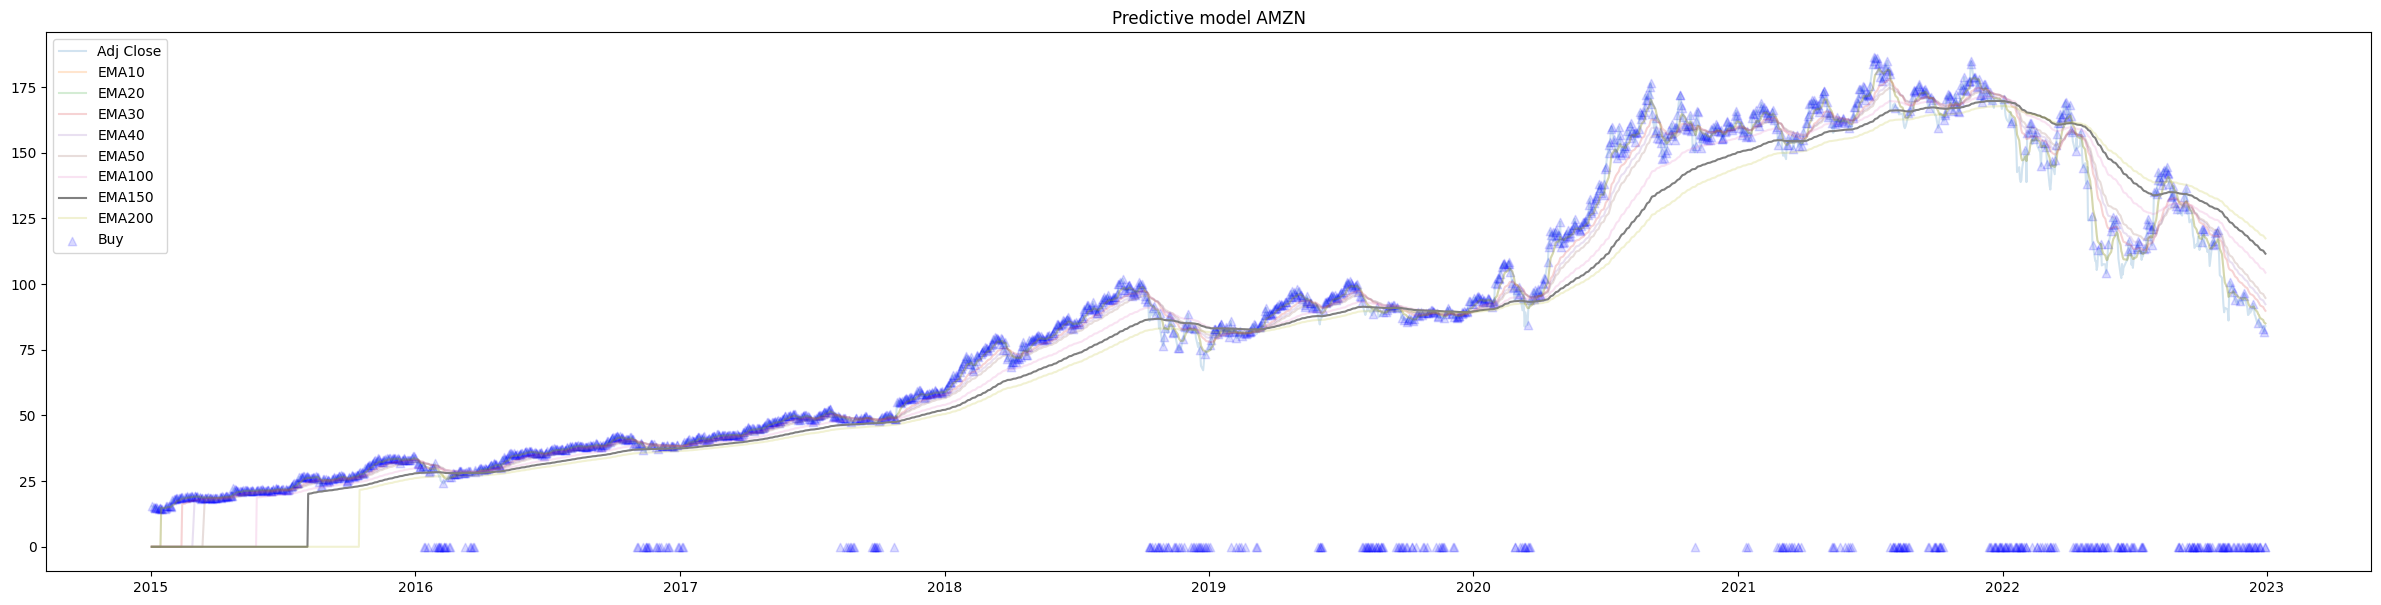

In [49]:
plot_stock_prediction(new_df, ticker)

In [50]:
# zoom in on the data
temp_df = new_df[-2000:-1000]

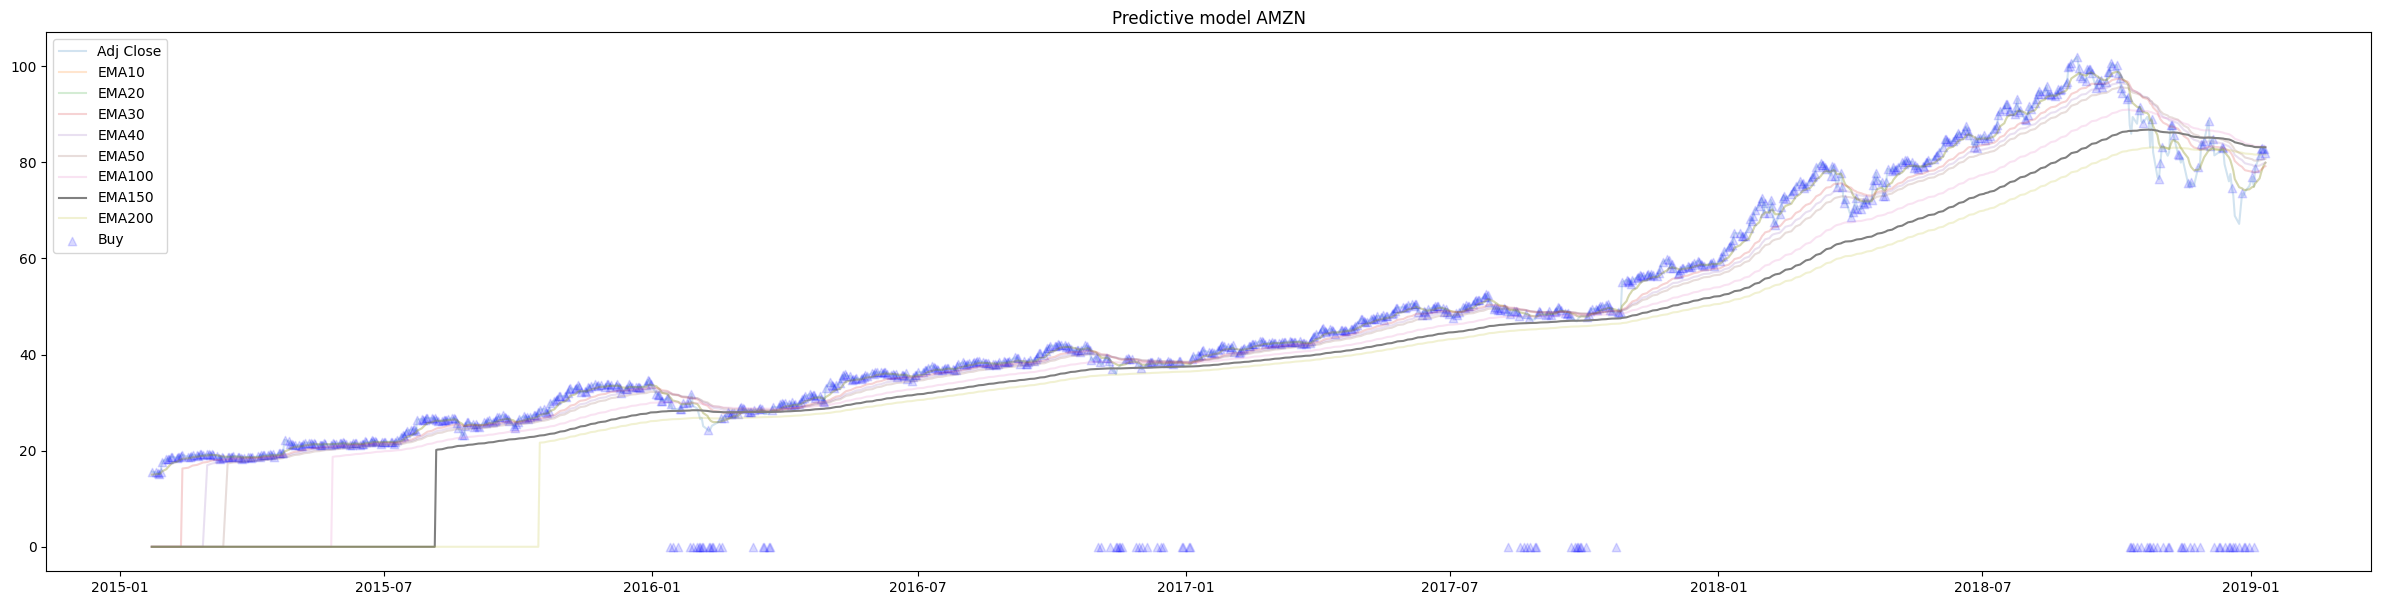

In [51]:
plot_stock_prediction(temp_df, ticker)

## 7) Calculate strategy returns 

### **Strategy** . This is primitive approach to get best returns here based on our model prediction Buy call and based on targetted return we do a sell call and calculate the return . This customizable and extendable with more iterations for the best returns . In current scope with less number of trades and long term investing we calculated returs for backtesting using pyfolio.

In [52]:
def returns(book):
    # profit and loss calculation for stratgies
    rtn = 0.0
    book['return'] = 0.0
    book["strat_daily_return"] = book["Adj Close"].pct_change()
    buy = 0.0
    sell = 0.0

    for date in book.index:
        if book.loc[date, 'Buy'] == 1 and book.shift(1).loc[date, 'Buy'] == 0 :     # long enter
            if book.loc[date, 'Adj Close'] > buy:
              print('current buy position at '+ str(buy )+ ' new buy opetion price'+ str(book.loc[date, 'Adj Close'] ) )
              buy = book.loc[date, 'Adj Close']
              dt = date
              print('entry date : ',dt, 'long entry price : ', buy)
        elif book.loc[date, 'Buy'] == 0 and book.shift(1).loc[date, 'Buy'] == 1 :     # long clearing
            sell = book.loc[date, 'Adj Close']
            if sell > buy and buy != 0 and (sell - buy) > 0 :

              rtn = (sell - buy) / buy 
              book.loc[date, 'return'] = round(rtn, 4)
              dt = date
              if rtn > 0 :
                print('liquidation date : ',dt, 'long entry price : ', buy, ' |  long liquidation price : ', \
                    sell, ' | return:', round(rtn, 4)) 
    
  
    acc_rtn = 1.0
    for date in book.index:
        rtn = book.loc[date, 'return']
        acc_rtn = acc_rtn * rtn  # Calculate cumulative return
        book.loc[date, 'acc return'] = acc_rtn

    return (round(acc_rtn, 4)) , book

In [53]:
accumulated_returns , book = returns(new_df)

current buy position at 0.0 new buy opetion price29.649999618530273
entry date :  2016-01-14 00:00:00 long entry price :  29.649999618530273
current buy position at 29.649999618530273 new buy opetion price31.767499923706055
entry date :  2016-01-28 00:00:00 long entry price :  31.767499923706055
liquidation date :  2016-11-02 00:00:00 long entry price :  31.767499923706055  |  long liquidation price :  38.27799987792969  | return: 0.2049
current buy position at 31.767499923706055 new buy opetion price38.35150146484375
entry date :  2016-11-03 00:00:00 long entry price :  38.35150146484375
current buy position at 38.35150146484375 new buy opetion price39.246498107910156
entry date :  2016-11-07 00:00:00 long entry price :  39.246498107910156
liquidation date :  2017-08-10 00:00:00 long entry price :  39.246498107910156  |  long liquidation price :  47.84600067138672  | return: 0.2191
current buy position at 39.246498107910156 new buy opetion price48.39950180053711
entry date :  2017-08-

In [54]:
book['return']

Date
2015-01-02    0.0
2015-01-05    0.0
2015-01-06    0.0
2015-01-07    0.0
2015-01-08    0.0
             ... 
2022-12-23    0.0
2022-12-27    0.0
2022-12-28    0.0
2022-12-29    0.0
2022-12-30    0.0
Name: return, Length: 2014, dtype: float64

In [55]:
print(book['return'].loc[book['return'] != 0.0])

Date
2016-11-02    0.2049
2017-08-10    0.2191
2018-10-10    0.7986
2019-08-01    0.0194
2020-02-27    0.0333
2020-11-02    0.5376
2021-01-11    0.0216
2021-02-24    0.0124
2021-05-10    0.0141
2021-07-30    0.0194
2021-09-20    0.0032
2021-09-22    0.0105
Name: return, dtype: float64


In [56]:
new_df['daily_return'] = new_df['Adj Close'].pct_change()

In [57]:
new_df['daily_return'].head()

Date
2015-01-02         NaN
2015-01-05   -0.020517
2015-01-06   -0.022833
2015-01-07    0.010600
2015-01-08    0.006836
Name: daily_return, dtype: float64

In [58]:
new_df['st_return'] = (1+new_df['daily_return']).cumprod()

In [59]:
new_df['return'].cummax()

Date
2015-01-02    0.0000
2015-01-05    0.0000
2015-01-06    0.0000
2015-01-07    0.0000
2015-01-08    0.0000
               ...  
2022-12-23    0.7986
2022-12-27    0.7986
2022-12-28    0.7986
2022-12-29    0.7986
2022-12-30    0.7986
Name: return, Length: 2014, dtype: float64

<Axes: xlabel='Date'>

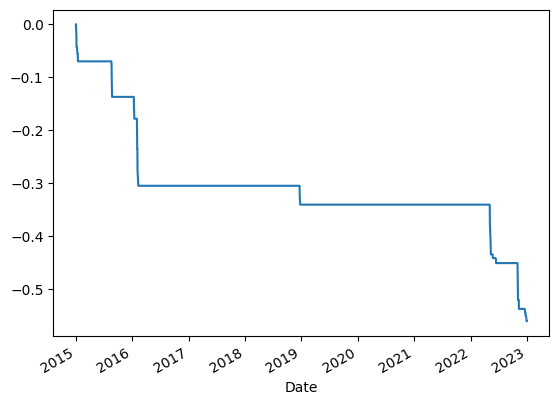

In [60]:
historical_max = new_df['Adj Close'].cummax()
daily_drawdown = new_df['Adj Close'] / historical_max - 1.0
historical_dd = daily_drawdown.cummin()
historical_dd.plot()

In [61]:
#CAGR = new_df.loc['2019-06-24','st_return'] ** (252./len(new_df.index)) -1
Sharpe = np.mean(new_df['daily_return']) / np.std(new_df['daily_return']) * np.sqrt(252.)
VOL = np.std(new_df['daily_return']) * np.sqrt(252.)
MDD = historical_dd.min()

In [62]:
#print('CAGR : ',round(CAGR*100,2),'%')
print('Sharpe of buy and hold strategy : ',round(Sharpe,2))
print('VOL : ',round(VOL*100,2),'%')
print('MDD : ',round(-1*MDD*100,2),'%')

Sharpe of buy and hold strategy :  0.8
VOL :  33.29 %
MDD :  56.15 %


In [63]:
new_df.shape

(2014, 52)

<Axes: xlabel='Date'>

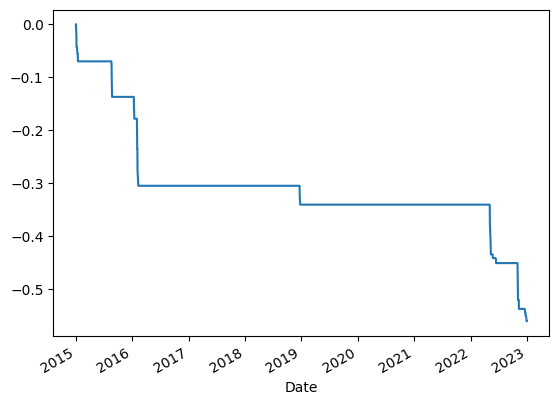

In [64]:
strat_historical_max = book['Adj Close'].cummax()
strat_drawdown = book['Adj Close'] / strat_historical_max - 1.0
strat_historical_dd = strat_drawdown.cummin()
strat_historical_dd.plot()

In [65]:
Sharpe_exp_ma = np.mean(book['return']) / np.std(book['return']) * np.sqrt(252.)
VOL_exp_ma = np.std(book['return']) * np.sqrt(252.)
MDD_exp_ma = strat_historical_dd.min()

In [66]:
print('Sharpe of buy exponential strategy : ',round(Sharpe_exp_ma,2))
print('VOLexponential strategy : ',round(VOL_exp_ma*100,2),'%')
print('MDD : ',round(-1*MDD_exp_ma*100,2),'%')

Sharpe of buy exponential strategy :  0.66
VOLexponential strategy :  35.69 %
MDD :  56.15 %


## 8) Integrate strategies with pyfolio for backtesting 

### **pyfolio** is a Python library for performance and risk analysis of financial portfolios that works well with the Zipline open source backtesting library  . At the core of pyfolio are various tear sheets that combine various individual plots and summary statistics to provide a comprehensive view of the performance of a trading algorithm.

In [67]:
#!pip install git+https://github.com/quantopian/pyfolio

In [68]:
#import pyfolio as pf

In [69]:
#pf.create_returns_tear_sheet(strat_returns['returns'])

We are using reloaded version of pyfolio quantopian closed furthur development on pyfolio

In [70]:
!pip install pyfolio-reloaded

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.5 MB/s eta 0:00:00


In [71]:
import pyfolio as pf

/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


**Peformance statistics**

**Annual Returns:** % annual returns

**Cum Returns Final:** % cummulative returns in last 10 years

**Annual volatility:** % annual volatility (risk)

**Sharp Ratio:** Compares performance of an asset w.r.t risk free asset.

**Calmar Ratio:**
Compounded annual growth rate divided by the maximum drawdown.
The maximum drawdown is the maximum peak to trough of the returns measured over a three year period.

**Max drawdown:** Highest percentage loss from the previous peak

**Calmar ratio:** Annual portfolio return relative to maximal drawdown

**Omega ratio:** Probability-weighted ratio of gains versus losses for a return target, zero per default

**Sortino ratio:** Excess return relative to downside standard deviation
Tail ratio: Size of the right tail (gains, the absolute value of the 95th percentile) relative to the size of the left tail (losses, absolute value of the 5th percentile)

**Daily value at risk (VaR):** Loss corresponding to a return two standard deviations below the daily mean

**Alpha:** Portfolio return unexplained by the benchmark return
Beta: Exposure to the benchmark

/usr/local/lib/python3.10/dist-packages/empyrical/stats.py:1412: RuntimeWarning: invalid value encountered in scalar divide
  return np.abs(np.percentile(returns, 95)) / np.abs(np.percentile(returns, 5))


Start date,2015-01-02
End date,2022-12-30
Total months,95
,Backtest
Annual return,21.164%
Cumulative returns,363.79%
Annual volatility,35.695%
Sharpe ratio,0.66
Calmar ratio,NaN
Stability,0.94
Max drawdown,0.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.00,2015-01-02,2015-01-02,2015-01-02,1
1,NaN,NaT,NaT,NaT,NaN
2,NaN,NaT,NaT,NaT,NaN
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


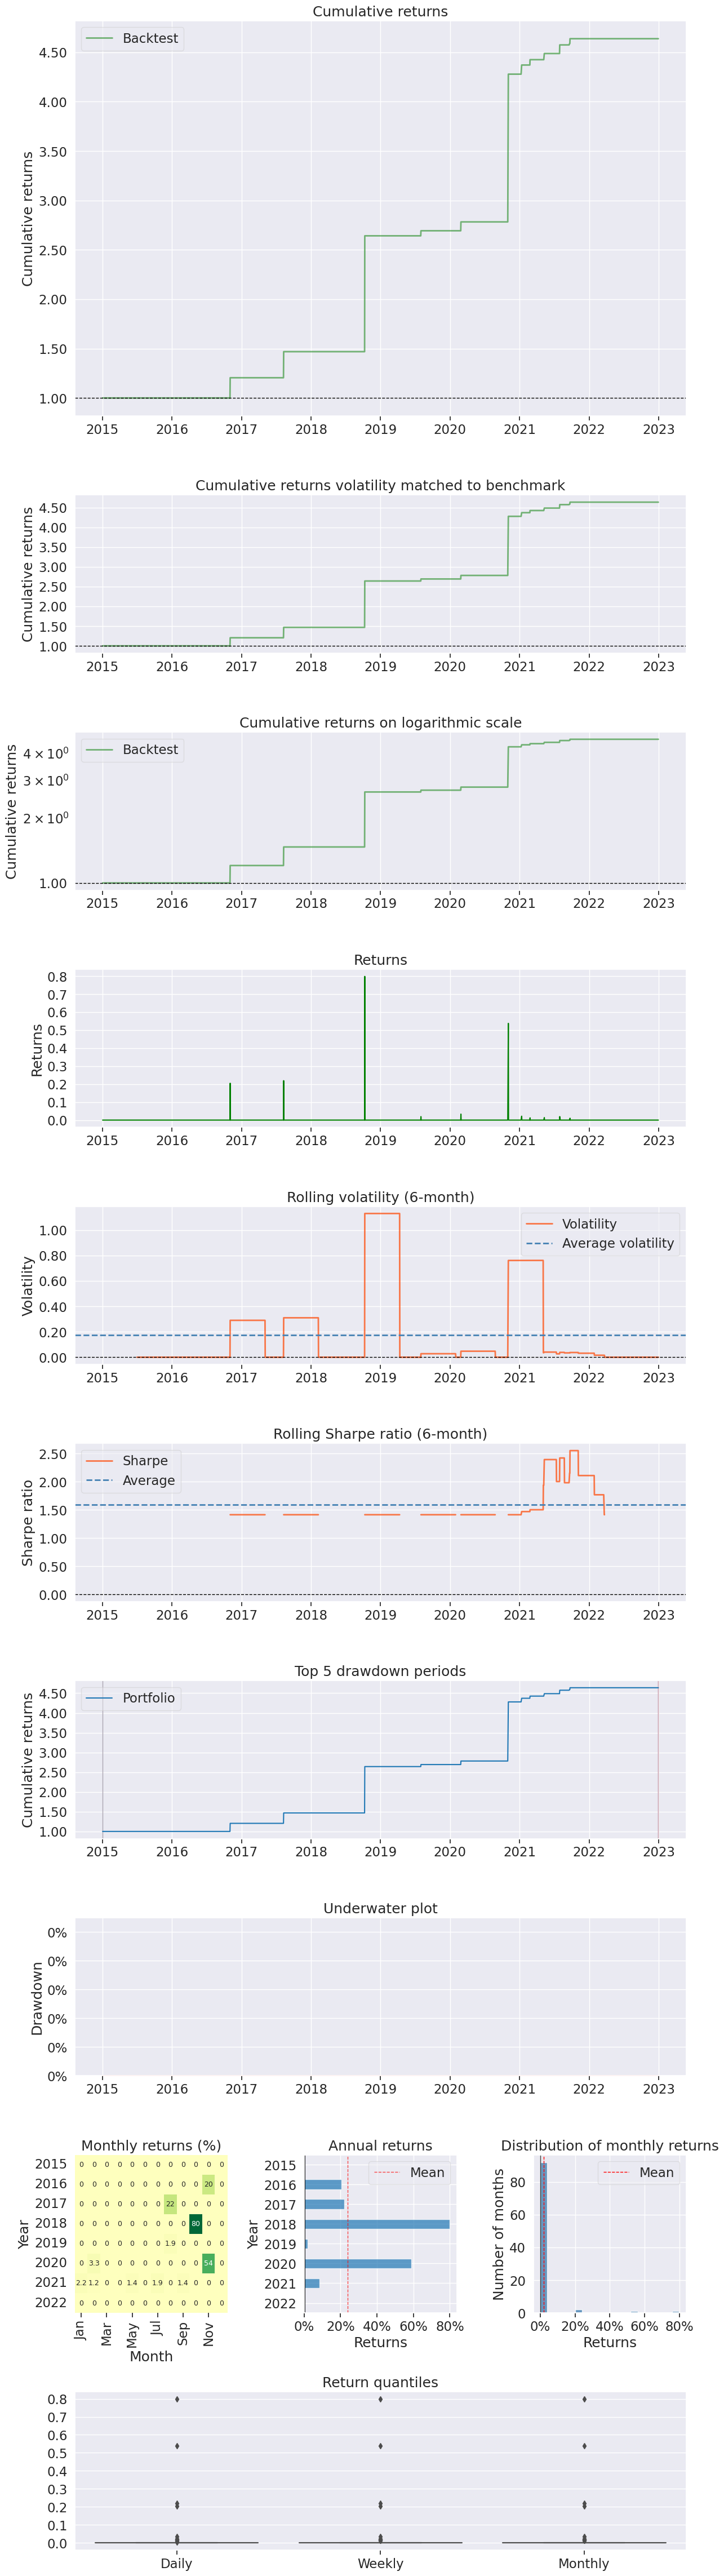

In [72]:
pf.create_returns_tear_sheet(book['return'])#strat_returns['returns'])  #,live_start_date='2016-01-01')

### below spy returns back test using pyfolio for the comparision of our stratagey with market

In [73]:
import yfinance as yf
#  Retrieve asset info
symbol = 'AAPL'
AAPL_yahoo_info = yf.Ticker(symbol)
AAPL_history = AAPL_yahoo_info.history(period="10y")
#tsla_history.index = tsla_history.index.tz_localize('utc')
#  Calculate returns
AAPL_returns = AAPL_history.Close.pct_change()
print(type(AAPL_returns.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [74]:
#  Retrieve asset info
symbol = 'SPY'
SPY_yahoo_info = yf.Ticker(symbol)
#print(SPY_yahoo_info)
SPY_history = SPY_yahoo_info.history(period="10y")
print(type(SPY_history.index))
print(SPY_history)
#ndx_history.index = ndx_history.index.tz_localize('utc')
#  Calculate returns
SPY_returns = SPY_history.Close.pct_change()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
                                 Open        High         Low       Close     Volume  Dividends  Stock Splits  Capital Gains
Date                                                                                                                        
2013-05-28 00:00:00-04:00  138.819992  139.434980  137.797794  138.205017  143679800        0.0           0.0            0.0
2013-05-29 00:00:00-04:00  137.473735  137.789541  136.576190  137.307526  160363400        0.0           0.0            0.0
2013-05-30 00:00:00-04:00  137.415533  138.446038  137.307492  137.814438  107793800        0.0           0.0            0.0
2013-05-31 00:00:00-04:00  137.432148  138.213345  135.570585  135.836517  176850100        0.0           0.0            0.0
2013-06-03 00:00:00-04:00  136.152334  136.675905  135.179997  136.584488  168390700        0.0           0.0            0.0
...                               ...         ...         ...         .

Start date,2013-05-28
End date,2023-05-26
Total months,119
,Backtest
Annual return,29.069%
Cumulative returns,1181.657%
Annual volatility,28.599%
Sharpe ratio,1.04
Calmar ratio,0.75
Stability,0.94
Max drawdown,-38.516%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,38.52,2018-10-03,2019-01-03,2019-10-10,267
1,31.43,2020-02-12,2020-03-23,2020-06-05,83
2,30.91,2022-01-03,2023-01-05,NaT,NaN
3,30.44,2015-05-22,2016-05-12,2017-02-01,444
4,20.38,2020-09-01,2020-09-18,2020-12-28,85


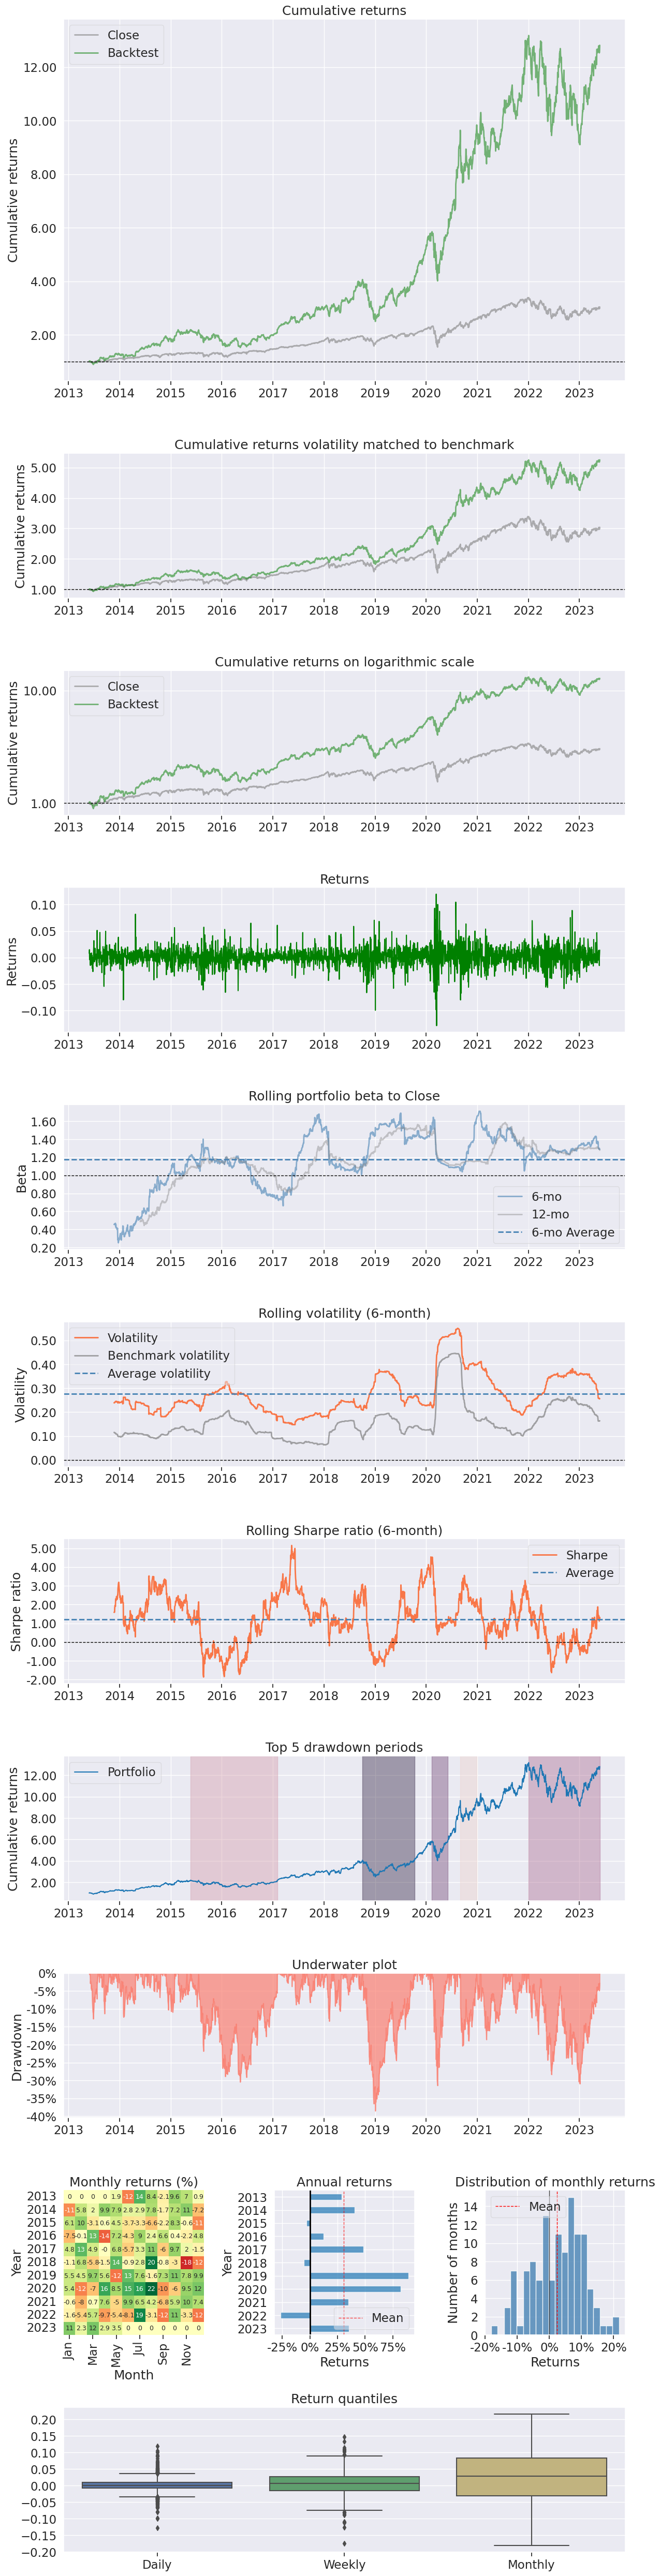

In [75]:
#  Create tearsheet
fig = pf.create_returns_tear_sheet(AAPL_returns, benchmark_rets=SPY_returns, return_fig=True)
#  Store plots in a fil
file_name = f"{symbol}_tearsheet.png"
fig.savefig(file_name, format="png")

## References

https://blog.jovian.com/torch-logistic-regression-on-iris-dataset-d966b23339da

https://www.kaggle.com/aaditkapoor1201/iris-classification-pytorch

https://campus.datacamp.com/courses/introduction-to-portfolio-analysis-in-python/performance-attribution?ex=12

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

https://pyfolio.ml4trading.io/